In [1]:
# Import Library
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

In [2]:
# Import Data
df = pd.read_csv('C:/Users/vishal/CarPrice Data.csv')

In [3]:
df.head()

,car_ID,symboling,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,...,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
0,1,3,alfa-romero giulia,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495.0
1,2,3,alfa-romero stelvio,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500.0
2,3,1,alfa-romero Quadrifoglio,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500.0
3,4,2,audi 100 ls,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950.0
4,5,2,audi 100ls,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450.0


In [4]:
print(list(df.columns.values)) # This is the way we can get all the columns name (Not in Info)

['car_ID', 'symboling', 'CarName', 'fueltype', 'aspiration', 'doornumber', 'carbody', 'drivewheel', 'enginelocation', 'wheelbase', 'carlength', 'carwidth', 'carheight', 'curbweight', 'enginetype', 'cylindernumber', 'enginesize', 'fuelsystem', 'boreratio', 'stroke', 'compressionratio', 'horsepower', 'peakrpm', 'citympg', 'highwaympg', 'price']


In [5]:
# how to get the particular object type
df.select_dtypes(include='object').columns

Index(['CarName', 'fueltype', 'aspiration', 'doornumber', 'carbody',
       'drivewheel', 'enginelocation', 'enginetype', 'cylindernumber',
       'fuelsystem'],
      dtype='object')

In [6]:
# To get the null value in percentage
round(100*(df.isnull().sum()/len(df.index)),2)

car_ID              0.0
symboling           0.0
CarName             0.0
fueltype            0.0
aspiration          0.0
doornumber          0.0
carbody             0.0
drivewheel          0.0
enginelocation      0.0
wheelbase           0.0
carlength           0.0
carwidth            0.0
carheight           0.0
curbweight          0.0
enginetype          0.0
cylindernumber      0.0
enginesize          0.0
fuelsystem          0.0
boreratio           0.0
stroke              0.0
compressionratio    0.0
horsepower          0.0
peakrpm             0.0
citympg             0.0
highwaympg          0.0
price               0.0
dtype: float64

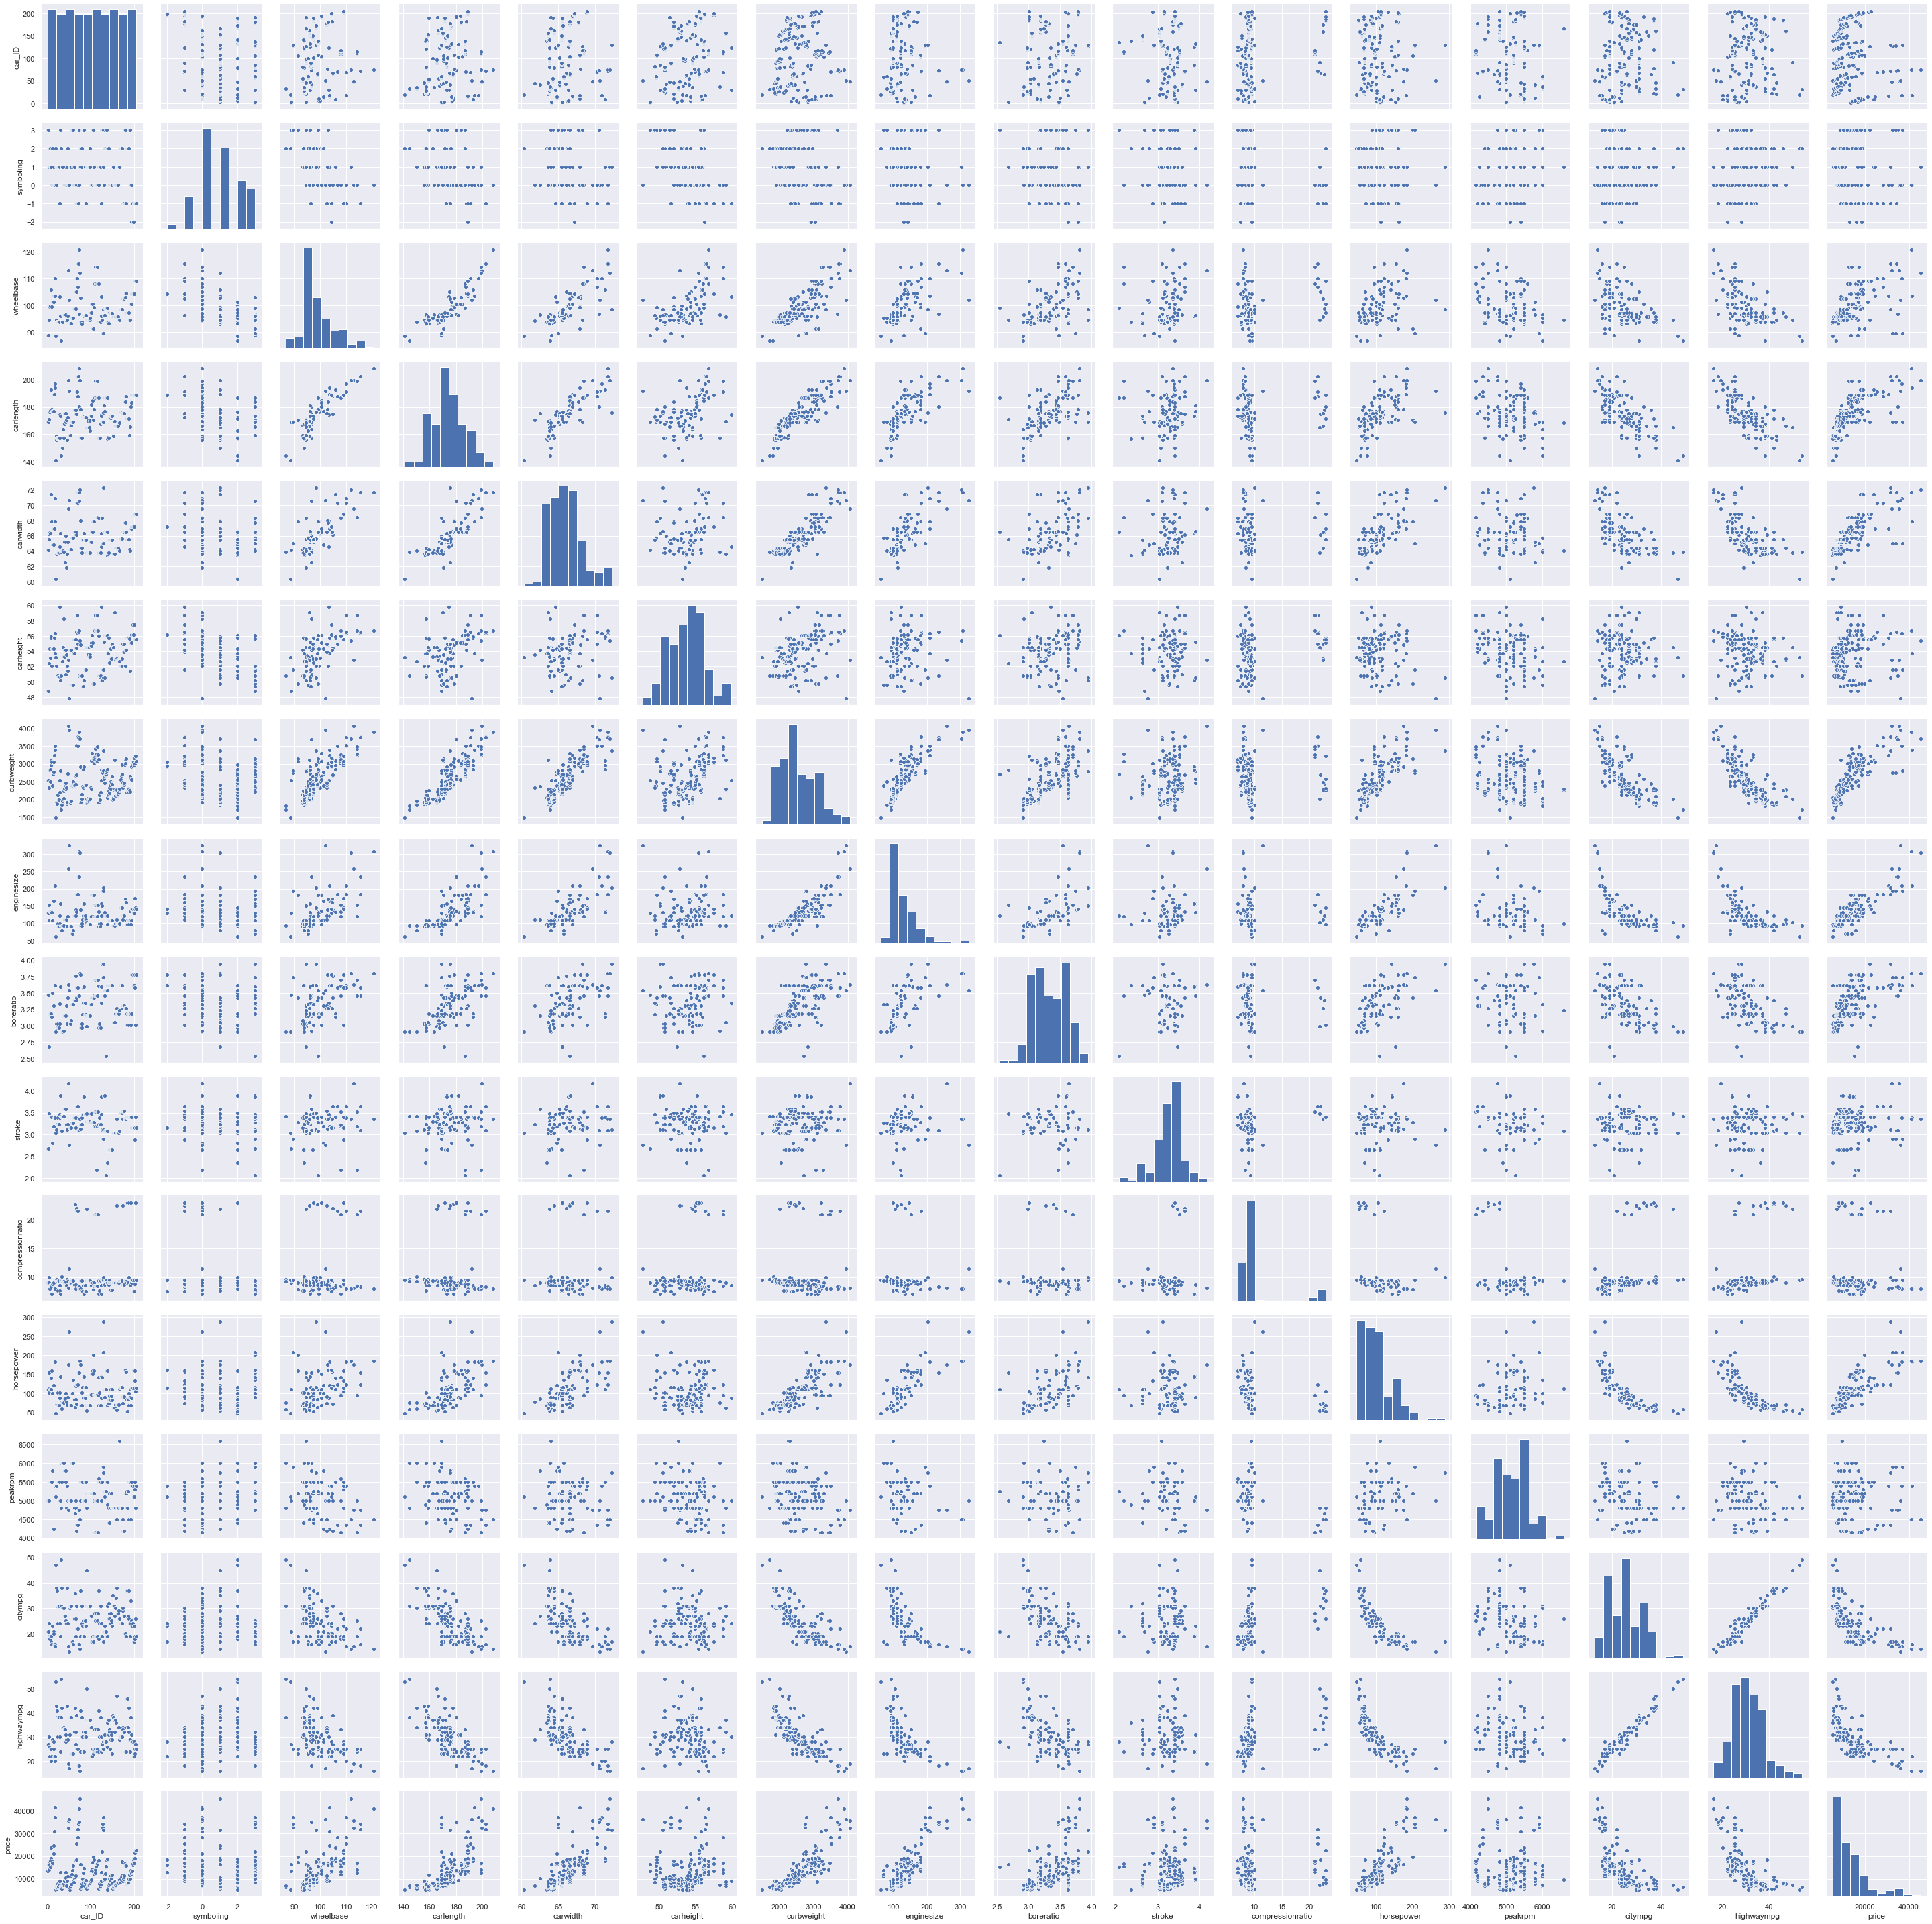

In [7]:
# Visual the Dataset in pair plot
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

sns.pairplot(df)
plt.show()

In [8]:
# Get the numerical values holding Columns
df.select_dtypes(include='int64').columns

Index(['car_ID', 'symboling', 'curbweight', 'enginesize', 'horsepower',
       'peakrpm', 'citympg', 'highwaympg'],
      dtype='object')

C:\Users\vishal\Anaconda4\lib\site-packages\seaborn\axisgrid.py:2065: UserWarning: The `size` parameter has been renamed to `height`; pleaes update your code.
  warnings.warn(msg, UserWarning)


<Figure size 432x432 with 0 Axes>

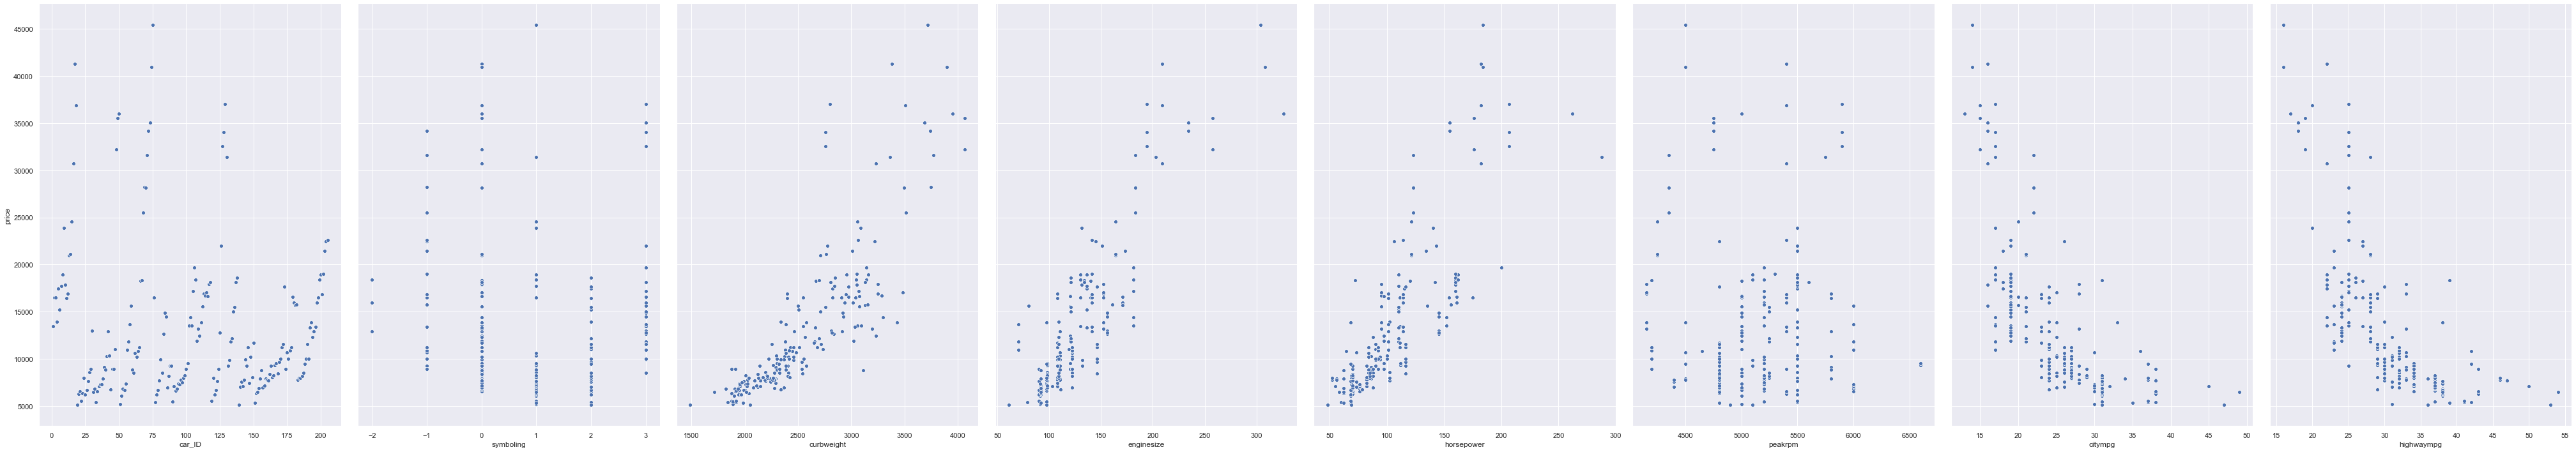

In [9]:
# Pair Plot amonge these columns
plt.figure(figsize = (6,6))
Numerical=(['car_ID', 'symboling', 'curbweight', 'enginesize', 'horsepower','peakrpm', 'citympg', 'highwaympg'])
sns.pairplot(df, x_vars=Numerical , y_vars='price',size=10,aspect=.7 ,kind='scatter')
plt.show()

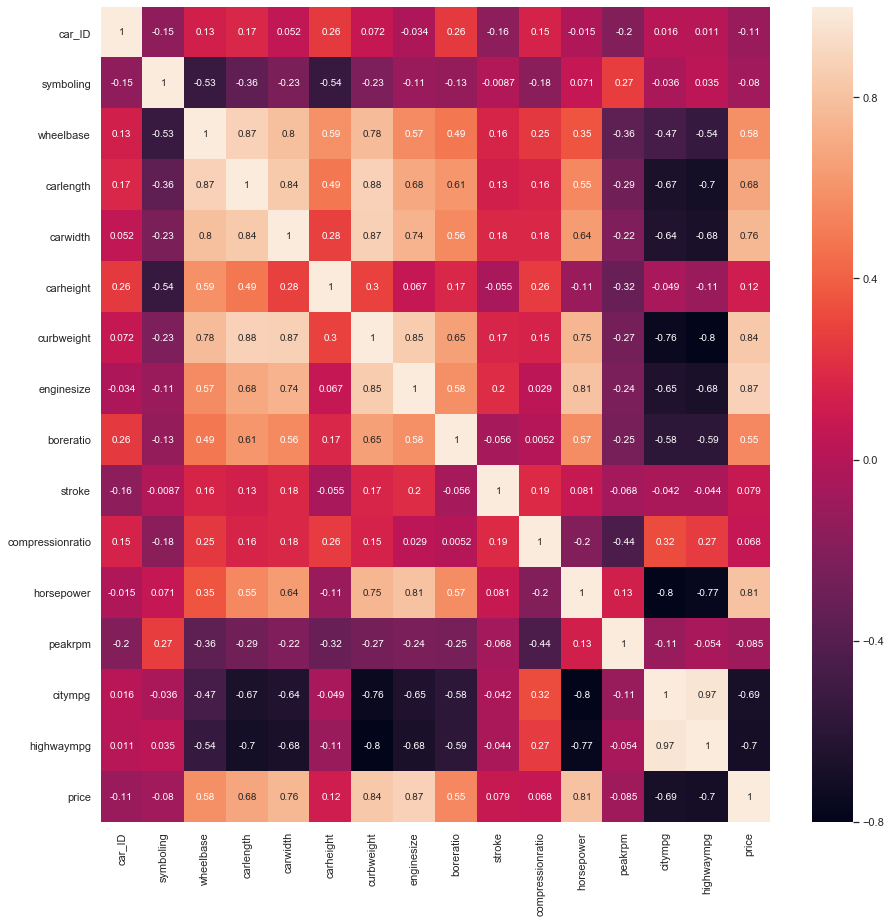

In [10]:
# Heat Plot amonge these columns
plt.figure(figsize =(15,15))
sns.heatmap(df.corr(), annot=True)

# Handling the Categorical Value

In [11]:
# New data frame with split value columns 
new = df["CarName"].str.split(" ", n = 1, expand = True) 
  
# Making separate first name column from new data frame 
df["CarName1"]= new[0] 
  
# Dropping old Name columns 
df.drop(columns =["CarName"], inplace = True) 

In [12]:
# Some Value are same so will replace the actual value
df['CarName1']=df['CarName1'].apply(lambda i:i if pd.isnull(i) else i.replace('maxda','mazda'))
df['CarName1']=df['CarName1'].apply(lambda i:i if pd.isnull(i) else i.replace('Nissan','nissan'))
df['CarName1']=df['CarName1'].apply(lambda i:i if pd.isnull(i) else i.replace('porcshce','porsche'))
df['CarName1']=df['CarName1'].apply(lambda i:i if pd.isnull(i) else i.replace('toyouta','toyota'))
df['CarName1']=df['CarName1'].apply(lambda i:i if pd.isnull(i) else i.replace('vokswagen','volkswagen'))
df['CarName1']=df['CarName1'].apply(lambda i:i if pd.isnull(i) else i.replace('vw','volkswagen'))

In [13]:
df['CarName1'].unique()

array(['alfa-romero', 'audi', 'bmw', 'chevrolet', 'dodge', 'honda',
       'isuzu', 'jaguar', 'mazda', 'buick', 'mercury', 'mitsubishi',
       'nissan', 'peugeot', 'plymouth', 'porsche', 'renault', 'saab',
       'subaru', 'toyota', 'volkswagen', 'volvo'], dtype=object)

In [14]:
df['drivewheel'].unique()

array(['rwd', 'fwd', '4wd'], dtype=object)

In [15]:
# As the 4wd and fwd are Same , Value is replaced
df['drivewheel']=df['drivewheel'].apply(lambda i:i if pd.isnull(i) else i.replace('4wd','fwd'))

In [16]:
# Convert the symboling to categorical
df.symboling = pd.Categorical(df.symboling)

In [17]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 26 columns):
car_ID              205 non-null int64
symboling           205 non-null category
fueltype            205 non-null object
aspiration          205 non-null object
doornumber          205 non-null object
carbody             205 non-null object
drivewheel          205 non-null object
enginelocation      205 non-null object
wheelbase           205 non-null float64
carlength           205 non-null float64
carwidth            205 non-null float64
carheight           205 non-null float64
curbweight          205 non-null int64
enginetype          205 non-null object
cylindernumber      205 non-null object
enginesize          205 non-null int64
fuelsystem          205 non-null object
boreratio           205 non-null float64
stroke              205 non-null float64
compressionratio    205 non-null float64
horsepower          205 non-null int64
peakrpm             205 non-null int64
citympg    

In [18]:
# To know the Unique Value
def cat_all_value(n):
    print('%s values : -' % n)
    print(df[n].unique())
    print('\n')
    
Cat_Var=['symboling','fueltype','aspiration','doornumber','carbody','drivewheel','enginelocation', 'enginetype', 'cylindernumber', 'fuelsystem', 'CarName1']
[ cat_all_value(item) for item in Cat_Var]    

symboling values : -
[3, 1, 2, 0, -1, -2]
Categories (6, int64): [3, 1, 2, 0, -1, -2]


fueltype values : -
['gas' 'diesel']


aspiration values : -
['std' 'turbo']


doornumber values : -
['two' 'four']


carbody values : -
['convertible' 'hatchback' 'sedan' 'wagon' 'hardtop']


drivewheel values : -
['rwd' 'fwd']


enginelocation values : -
['front' 'rear']


enginetype values : -
['dohc' 'ohcv' 'ohc' 'l' 'rotor' 'ohcf' 'dohcv']


cylindernumber values : -
['four' 'six' 'five' 'three' 'twelve' 'two' 'eight']


fuelsystem values : -
['mpfi' '2bbl' 'mfi' '1bbl' 'spfi' '4bbl' 'idi' 'spdi']


CarName1 values : -
['alfa-romero' 'audi' 'bmw' 'chevrolet' 'dodge' 'honda' 'isuzu' 'jaguar'
 'mazda' 'buick' 'mercury' 'mitsubishi' 'nissan' 'peugeot' 'plymouth'
 'porsche' 'renault' 'saab' 'subaru' 'toyota' 'volkswagen' 'volvo']




[None, None, None, None, None, None, None, None, None, None, None]

In [19]:
Cat_df=pd.get_dummies(df.loc[:,Cat_Var], prefix=Cat_Var, drop_first=True)
Cat_df.head()

,symboling_-1,symboling_0,symboling_1,symboling_2,symboling_3,fueltype_gas,aspiration_turbo,doornumber_two,carbody_hardtop,carbody_hatchback,...,CarName1_nissan,CarName1_peugeot,CarName1_plymouth,CarName1_porsche,CarName1_renault,CarName1_saab,CarName1_subaru,CarName1_toyota,CarName1_volkswagen,CarName1_volvo
0,0,0,0,0,1,1,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,1,1,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,1,0,0,1,0,1,0,1,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,1,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,1,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [20]:
# Create a master Data
df_Master=pd.concat([df.loc[:,Numerical], Cat_df,df.loc[:, 'price']],axis=1)
df_Master.head()

,car_ID,symboling,curbweight,enginesize,horsepower,peakrpm,citympg,highwaympg,symboling_-1,symboling_0,...,CarName1_peugeot,CarName1_plymouth,CarName1_porsche,CarName1_renault,CarName1_saab,CarName1_subaru,CarName1_toyota,CarName1_volkswagen,CarName1_volvo,price
0,1,3,2548,130,111,5000,21,27,0,0,...,0,0,0,0,0,0,0,0,0,13495.0
1,2,3,2548,130,111,5000,21,27,0,0,...,0,0,0,0,0,0,0,0,0,16500.0
2,3,1,2823,152,154,5000,19,26,0,0,...,0,0,0,0,0,0,0,0,0,16500.0
3,4,2,2337,109,102,5500,24,30,0,0,...,0,0,0,0,0,0,0,0,0,13950.0
4,5,2,2824,136,115,5500,18,22,0,0,...,0,0,0,0,0,0,0,0,0,17450.0


In [21]:
# This Columns is converted in Dummies Values
df_Master.drop(["symboling"], axis = 1, inplace = True)

In [22]:
df_Master.head()

,car_ID,curbweight,enginesize,horsepower,peakrpm,citympg,highwaympg,symboling_-1,symboling_0,symboling_1,...,CarName1_peugeot,CarName1_plymouth,CarName1_porsche,CarName1_renault,CarName1_saab,CarName1_subaru,CarName1_toyota,CarName1_volkswagen,CarName1_volvo,price
0,1,2548,130,111,5000,21,27,0,0,0,...,0,0,0,0,0,0,0,0,0,13495.0
1,2,2548,130,111,5000,21,27,0,0,0,...,0,0,0,0,0,0,0,0,0,16500.0
2,3,2823,152,154,5000,19,26,0,0,1,...,0,0,0,0,0,0,0,0,0,16500.0
3,4,2337,109,102,5500,24,30,0,0,0,...,0,0,0,0,0,0,0,0,0,13950.0
4,5,2824,136,115,5500,18,22,0,0,0,...,0,0,0,0,0,0,0,0,0,17450.0


In [23]:
# Apply Normalization
def minMaxScaler (x): 
    return ( (x-np.min(x))/ (max(x) - min(x)))

In [24]:
df_Master = df_Master.apply(minMaxScaler)
df_Master.head()

,car_ID,curbweight,enginesize,horsepower,peakrpm,citympg,highwaympg,symboling_-1,symboling_0,symboling_1,...,CarName1_peugeot,CarName1_plymouth,CarName1_porsche,CarName1_renault,CarName1_saab,CarName1_subaru,CarName1_toyota,CarName1_volkswagen,CarName1_volvo,price
0,0.000000,0.411171,0.260377,0.262500,0.346939,0.222222,0.289474,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.207959
1,0.004902,0.411171,0.260377,0.262500,0.346939,0.222222,0.289474,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.282558
2,0.009804,0.517843,0.343396,0.441667,0.346939,0.166667,0.263158,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.282558
3,0.014706,0.329325,0.181132,0.225000,0.551020,0.305556,0.368421,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.219254
4,0.019608,0.518231,0.283019,0.279167,0.551020,0.138889,0.157895,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.306142


In [25]:
df_Master = df_Master.iloc[3:]

# Splitting data into training and testing sets

In [26]:
print(list(df_Master.columns))

['car_ID', 'curbweight', 'enginesize', 'horsepower', 'peakrpm', 'citympg', 'highwaympg', 'symboling_-1', 'symboling_0', 'symboling_1', 'symboling_2', 'symboling_3', 'fueltype_gas', 'aspiration_turbo', 'doornumber_two', 'carbody_hardtop', 'carbody_hatchback', 'carbody_sedan', 'carbody_wagon', 'drivewheel_rwd', 'enginelocation_rear', 'enginetype_dohcv', 'enginetype_l', 'enginetype_ohc', 'enginetype_ohcf', 'enginetype_ohcv', 'enginetype_rotor', 'cylindernumber_five', 'cylindernumber_four', 'cylindernumber_six', 'cylindernumber_three', 'cylindernumber_twelve', 'cylindernumber_two', 'fuelsystem_2bbl', 'fuelsystem_4bbl', 'fuelsystem_idi', 'fuelsystem_mfi', 'fuelsystem_mpfi', 'fuelsystem_spdi', 'fuelsystem_spfi', 'CarName1_audi', 'CarName1_bmw', 'CarName1_buick', 'CarName1_chevrolet', 'CarName1_dodge', 'CarName1_honda', 'CarName1_isuzu', 'CarName1_jaguar', 'CarName1_mazda', 'CarName1_mercury', 'CarName1_mitsubishi', 'CarName1_nissan', 'CarName1_peugeot', 'CarName1_plymouth', 'CarName1_porsche

In [27]:
# Putting feature variable to X
X = df_Master[['car_ID', 'curbweight', 'enginesize', 'horsepower', 'peakrpm', 'citympg', 'highwaympg', 'symboling_-1', 'symboling_0', 'symboling_1', 'symboling_2', 'symboling_3', 'fueltype_gas', 'aspiration_turbo', 'doornumber_two', 'carbody_hardtop', 'carbody_hatchback', 'carbody_sedan', 'carbody_wagon', 'drivewheel_rwd', 'enginelocation_rear', 'enginetype_dohcv', 'enginetype_l', 'enginetype_ohc', 'enginetype_ohcf', 'enginetype_ohcv', 'enginetype_rotor', 'cylindernumber_five', 'cylindernumber_four', 'cylindernumber_six', 'cylindernumber_three', 'cylindernumber_twelve', 'cylindernumber_two', 'fuelsystem_2bbl', 'fuelsystem_4bbl', 'fuelsystem_idi', 'fuelsystem_mfi', 'fuelsystem_mpfi', 'fuelsystem_spdi', 'fuelsystem_spfi', 'CarName1_audi', 'CarName1_bmw', 'CarName1_buick', 'CarName1_chevrolet', 'CarName1_dodge', 'CarName1_honda', 'CarName1_isuzu', 'CarName1_jaguar', 'CarName1_mazda', 'CarName1_mercury', 'CarName1_mitsubishi', 'CarName1_nissan', 'CarName1_peugeot', 'CarName1_plymouth', 'CarName1_porsche', 'CarName1_renault', 'CarName1_saab', 'CarName1_subaru', 'CarName1_toyota', 'CarName1_volkswagen', 'CarName1_volvo']]

# Putting response variable to y
y = df_Master['price']

In [28]:
# random_state is the seed used by the random number generator. It can be any integer.
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.7 , random_state=100)

# Performing Linear Regression

In [29]:
from sklearn.linear_model import LinearRegression

In [30]:
# Representing LinearRegression as lr(Creating LinearRegression Object)
lm = LinearRegression()

In [31]:
# fit the model to the training data
lm.fit(X_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

# Model Evaluation

In [32]:
# print the intercept
print(lm.intercept_)

-0.43646309556069784


In [33]:
# Let's see the coefficient
coeff_df = pd.DataFrame(lm.coef_,X_test.columns,columns=['Coefficient'])
coeff_df.head()

,Coefficient
car_ID,0.564455
curbweight,0.389731
enginesize,0.483959
horsepower,0.027396
peakrpm,0.148792


# Predictions

In [34]:
# Making predictions using the model
y_pred = lm.predict(X_test)

# Calculating Error Terms

In [35]:
from sklearn.metrics import mean_squared_error, r2_score
mse = mean_squared_error(y_test, y_pred)
r_squared = r2_score(y_test, y_pred)

In [36]:
print('Mean_Squared_Error :' ,mse)
print('r_square_value :',r_squared)

Mean_Squared_Error : 0.003638072422086416
r_square_value : 0.8960102451987539


# Checking for P-value Using STATSMODELS

In [37]:
import statsmodels.api as sm
X_train_sm = X_train
#Unlike SKLearn, statsmodels don't automatically fit a constant, 
#so you need to use the method sm.add_constant(X) in order to add a constant. 
X_train_sm = sm.add_constant(X_train_sm)
# create a fitted model in one line
lm_1 = sm.OLS(y_train,X_train_sm).fit()

# print the coefficients
lm_1.params

C:\Users\vishal\Anaconda4\lib\site-packages\numpy\core\fromnumeric.py:2389: FutureWarning: Method .ptp is deprecated and will be removed in a future version. Use numpy.ptp instead.
  return ptp(axis=axis, out=out, **kwargs)


const                   -2.808545e-01
car_ID                   5.644547e-01
curbweight               3.897311e-01
enginesize               4.839589e-01
horsepower               2.739614e-02
peakrpm                  1.487920e-01
citympg                  6.298320e-02
highwaympg               9.087439e-02
symboling_-1             9.575710e-02
symboling_0              1.004575e-01
symboling_1              1.202443e-01
symboling_2              8.035677e-02
symboling_3              1.001676e-01
fueltype_gas            -1.462219e-01
aspiration_turbo         4.249249e-02
doornumber_two          -7.085032e-03
carbody_hardtop         -1.102052e-02
carbody_hatchback       -4.250141e-02
carbody_sedan           -3.564731e-02
carbody_wagon           -6.381027e-02
drivewheel_rwd           1.424062e-02
enginelocation_rear      1.455929e-01
enginetype_dohcv        -1.178262e-01
enginetype_l            -3.692841e-02
enginetype_ohc           6.807364e-02
enginetype_ohcf          3.724869e-03
enginetype_o

In [38]:
print(lm_1.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.961
Model:                            OLS   Adj. R-squared:                  0.939
Method:                 Least Squares   F-statistic:                     43.45
Date:                Sun, 13 Oct 2019   Prob (F-statistic):           1.56e-45
Time:                        06:53:30   Log-Likelihood:                 253.65
No. Observations:                 141   AIC:                            -403.3
Df Residuals:                      89   BIC:                            -250.0
Df Model:                          51                                         
Covariance Type:            nonrobust                                         
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
const                    -0.28

C:\Users\vishal\Anaconda4\lib\site-packages\statsmodels\base\model.py:1294: RuntimeWarning: invalid value encountered in true_divide
  return self.params / self.bse
C:\Users\vishal\Anaconda4\lib\site-packages\scipy\stats\_distn_infrastructure.py:877: RuntimeWarning: invalid value encountered in greater
  return (self.a < x) & (x < self.b)
C:\Users\vishal\Anaconda4\lib\site-packages\scipy\stats\_distn_infrastructure.py:877: RuntimeWarning: invalid value encountered in less
  return (self.a < x) & (x < self.b)
C:\Users\vishal\Anaconda4\lib\site-packages\scipy\stats\_distn_infrastructure.py:1831: RuntimeWarning: invalid value encountered in less_equal
  cond2 = cond0 & (x <= self.a)


# Implementing the results and running the model again

In [39]:
X_train_new = X_train[['car_ID', 'curbweight', 'enginesize', 'peakrpm', 'citympg', 'symboling_-1', 'symboling_0', 'symboling_1', 'symboling_2', 'symboling_3', 'fueltype_gas', 'aspiration_turbo', 'carbody_hardtop', 'carbody_hatchback', 'carbody_sedan', 'carbody_wagon', 'enginelocation_rear', 'enginetype_dohcv', 'enginetype_l', 'enginetype_ohcf', 'enginetype_ohcv', 'enginetype_rotor', 'cylindernumber_five', 'cylindernumber_four', 'cylindernumber_six', 'cylindernumber_three', 'cylindernumber_twelve', 'cylindernumber_two', 'fuelsystem_idi', 'fuelsystem_mfi', 'fuelsystem_spfi', 'CarName1_bmw', 'CarName1_buick', 'CarName1_chevrolet', 'CarName1_dodge', 'CarName1_honda', 'CarName1_isuzu', 'CarName1_jaguar', 'CarName1_mazda', 'CarName1_mercury', 'CarName1_mitsubishi', 'CarName1_nissan', 'CarName1_peugeot', 'CarName1_plymouth', 'CarName1_porsche', 'CarName1_renault', 'CarName1_saab', 'CarName1_subaru', 'CarName1_toyota', 'CarName1_volkswagen', 'CarName1_volvo']]
X_test_new = X_test[['car_ID', 'curbweight', 'enginesize', 'peakrpm', 'citympg' , 'symboling_-1', 'symboling_0', 'symboling_1', 'symboling_2', 'symboling_3', 'fueltype_gas', 'aspiration_turbo', 'carbody_hardtop', 'carbody_hatchback', 'carbody_sedan', 'carbody_wagon', 'enginelocation_rear', 'enginetype_dohcv', 'enginetype_l', 'enginetype_ohcf', 'enginetype_ohcv', 'enginetype_rotor', 'cylindernumber_five', 'cylindernumber_four', 'cylindernumber_six', 'cylindernumber_three', 'cylindernumber_twelve', 'cylindernumber_two',  'fuelsystem_idi', 'fuelsystem_mfi', 'fuelsystem_spfi', 'CarName1_bmw', 'CarName1_buick', 'CarName1_chevrolet', 'CarName1_dodge', 'CarName1_honda', 'CarName1_isuzu', 'CarName1_jaguar', 'CarName1_mazda', 'CarName1_mercury', 'CarName1_mitsubishi', 'CarName1_nissan', 'CarName1_peugeot', 'CarName1_plymouth', 'CarName1_porsche', 'CarName1_renault', 'CarName1_saab', 'CarName1_subaru', 'CarName1_toyota', 'CarName1_volkswagen', 'CarName1_volvo']]

In [40]:
# Model building
lm.fit(X_train_new,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [41]:
# Making predictions
y_pred_new1 = lm.predict(X_test_new)

In [42]:
from sklearn.metrics import mean_squared_error, r2_score
mse = mean_squared_error(y_test, y_pred_new1)
r_squared = r2_score(y_test, y_pred_new1)

In [43]:
print('Mean_Squared_Error :' ,mse)
print('r_square_value :',r_squared)

Mean_Squared_Error : 0.010315795927097535
r_square_value : 0.7051358619124587


In [44]:
import statsmodels.api as sm
X_train_n = X_train_new
#Unlike SKLearn, statsmodels don't automatically fit a constant, 
#so you need to use the method sm.add_constant(X) in order to add a constant. 
X_train_n = sm.add_constant(X_train_n)
# create a fitted model in one line
lm_1 = sm.OLS(y_train,X_train_new).fit()

# print the coefficients
lm_1.params

C:\Users\vishal\Anaconda4\lib\site-packages\numpy\core\fromnumeric.py:2389: FutureWarning: Method .ptp is deprecated and will be removed in a future version. Use numpy.ptp instead.
  return ptp(axis=axis, out=out, **kwargs)


car_ID                   4.876492e-01
curbweight               4.166021e-01
enginesize               4.654015e-01
peakrpm                  9.318889e-02
citympg                  1.159681e-01
symboling_-1             1.099554e-01
symboling_0              1.233074e-01
symboling_1              1.435308e-01
symboling_2              9.940381e-02
symboling_3              1.192190e-01
fueltype_gas            -6.164084e-02
aspiration_turbo         3.361258e-02
carbody_hardtop         -5.480537e-03
carbody_hatchback       -3.779409e-02
carbody_sedan           -2.789400e-02
carbody_wagon           -6.085797e-02
enginelocation_rear      1.580144e-01
enginetype_dohcv        -2.423126e-01
enginetype_l            -2.014429e-01
enginetype_ohcf         -1.488579e-01
enginetype_ohcv         -6.855808e-02
enginetype_rotor         2.221689e-02
cylindernumber_five     -1.376642e-01
cylindernumber_four     -1.039377e-01
cylindernumber_six      -9.820986e-02
cylindernumber_three     2.454656e-16
cylindernumb

In [45]:
print(lm_1.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.959
Model:                            OLS   Adj. R-squared:                  0.942
Method:                 Least Squares   F-statistic:                     55.07
Date:                Sun, 13 Oct 2019   Prob (F-statistic):           3.59e-52
Time:                        06:53:31   Log-Likelihood:                 250.02
No. Observations:                 141   AIC:                            -414.0
Df Residuals:                      98   BIC:                            -287.2
Df Model:                          42                                         
Covariance Type:            nonrobust                                         
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
car_ID                    0.48

C:\Users\vishal\Anaconda4\lib\site-packages\statsmodels\base\model.py:1294: RuntimeWarning: invalid value encountered in true_divide
  return self.params / self.bse
C:\Users\vishal\Anaconda4\lib\site-packages\scipy\stats\_distn_infrastructure.py:877: RuntimeWarning: invalid value encountered in greater
  return (self.a < x) & (x < self.b)
C:\Users\vishal\Anaconda4\lib\site-packages\scipy\stats\_distn_infrastructure.py:877: RuntimeWarning: invalid value encountered in less
  return (self.a < x) & (x < self.b)
C:\Users\vishal\Anaconda4\lib\site-packages\scipy\stats\_distn_infrastructure.py:1831: RuntimeWarning: invalid value encountered in less_equal
  cond2 = cond0 & (x <= self.a)


# Implementing the results and running the model again

In [46]:
X_train_new1 = X_train[['car_ID', 'curbweight', 'enginesize', 'peakrpm', 'citympg', 'symboling_-1', 'symboling_0', 'symboling_1', 'symboling_2', 'symboling_3', 'aspiration_turbo', 'carbody_wagon', 'enginelocation_rear', 'enginetype_dohcv', 'enginetype_l', 'enginetype_ohcf', 'enginetype_ohcv', 'cylindernumber_five', 'cylindernumber_four', 'cylindernumber_six', 'cylindernumber_three', 'cylindernumber_twelve', 'fuelsystem_mfi', 'CarName1_bmw', 'CarName1_chevrolet', 'CarName1_dodge', 'CarName1_honda', 'CarName1_isuzu', 'CarName1_jaguar', 'CarName1_mazda', 'CarName1_mercury', 'CarName1_mitsubishi', 'CarName1_nissan', 'CarName1_peugeot', 'CarName1_plymouth', 'CarName1_porsche', 'CarName1_renault', 'CarName1_saab', 'CarName1_subaru', 'CarName1_toyota', 'CarName1_volkswagen', 'CarName1_volvo']]
X_test_new1 = X_test[['car_ID', 'curbweight', 'enginesize', 'peakrpm', 'citympg' , 'symboling_-1', 'symboling_0', 'symboling_1', 'symboling_2', 'symboling_3', 'aspiration_turbo', 'carbody_wagon', 'enginelocation_rear', 'enginetype_dohcv', 'enginetype_l', 'enginetype_ohcf', 'enginetype_ohcv', 'cylindernumber_five', 'cylindernumber_four', 'cylindernumber_six', 'cylindernumber_three', 'cylindernumber_twelve',  'fuelsystem_mfi', 'CarName1_bmw', 'CarName1_chevrolet', 'CarName1_dodge', 'CarName1_honda', 'CarName1_isuzu', 'CarName1_jaguar', 'CarName1_mazda', 'CarName1_mercury', 'CarName1_mitsubishi', 'CarName1_nissan', 'CarName1_peugeot', 'CarName1_plymouth', 'CarName1_porsche', 'CarName1_renault', 'CarName1_saab', 'CarName1_subaru', 'CarName1_toyota', 'CarName1_volkswagen', 'CarName1_volvo']]

In [47]:
# Model building
lm.fit(X_train_new1,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [48]:
# Making predictions
y_pred_new2 = lm.predict(X_test_new1)

In [49]:
from sklearn.metrics import mean_squared_error, r2_score
mse = mean_squared_error(y_test, y_pred_new2)
r_squared = r2_score(y_test, y_pred_new2)

In [50]:
print('Mean_Squared_Error :' ,mse)
print('r_square_value :',r_squared)

Mean_Squared_Error : 0.007939509442633054
r_square_value : 0.7730590421539505


In [51]:
import statsmodels.api as sm
X_train_n1 = X_train_new1
#Unlike SKLearn, statsmodels don't automatically fit a constant, 
#so you need to use the method sm.add_constant(X) in order to add a constant. 
X_train_n1 = sm.add_constant(X_train_n1)
# create a fitted model in one line
lm_1 = sm.OLS(y_train,X_train_new1).fit()

# print the coefficients
lm_1.params

C:\Users\vishal\Anaconda4\lib\site-packages\numpy\core\fromnumeric.py:2389: FutureWarning: Method .ptp is deprecated and will be removed in a future version. Use numpy.ptp instead.
  return ptp(axis=axis, out=out, **kwargs)


car_ID                   3.725490e-01
curbweight               3.484382e-01
enginesize               4.657398e-01
peakrpm                  9.953360e-02
citympg                  4.937946e-02
symboling_-1             9.422671e-02
symboling_0              1.074437e-01
symboling_1              1.196628e-01
symboling_2              8.163418e-02
symboling_3              9.637907e-02
aspiration_turbo         3.236504e-02
carbody_wagon           -2.823068e-02
enginelocation_rear      1.646816e-01
enginetype_dohcv        -2.206730e-01
enginetype_l            -1.686940e-01
enginetype_ohcf         -1.083936e-01
enginetype_ohcv         -8.335031e-02
cylindernumber_five     -1.659163e-01
cylindernumber_four     -1.295704e-01
cylindernumber_six      -1.103325e-01
cylindernumber_three     1.771817e-17
cylindernumber_twelve   -1.407549e-16
fuelsystem_mfi          -9.804975e-17
CarName1_bmw             9.451140e-02
CarName1_chevrolet      -1.774775e-01
CarName1_dodge          -1.980013e-01
CarName1_hon

In [52]:
print(lm_1.summary())

                                 OLS Regression Results                                
Dep. Variable:                  price   R-squared (uncentered):                   0.979
Model:                            OLS   Adj. R-squared (uncentered):              0.973
Method:                 Least Squares   F-statistic:                              144.1
Date:                Sun, 13 Oct 2019   Prob (F-statistic):                    1.14e-74
Time:                        06:53:32   Log-Likelihood:                          247.48
No. Observations:                 141   AIC:                                     -425.0
Df Residuals:                     106   BIC:                                     -321.8
Df Model:                          35                                                  
Covariance Type:            nonrobust                                                  
                            coef    std err          t      P>|t|      [0.025      0.975]
------------------------------

C:\Users\vishal\Anaconda4\lib\site-packages\statsmodels\base\model.py:1294: RuntimeWarning: invalid value encountered in true_divide
  return self.params / self.bse
C:\Users\vishal\Anaconda4\lib\site-packages\scipy\stats\_distn_infrastructure.py:877: RuntimeWarning: invalid value encountered in greater
  return (self.a < x) & (x < self.b)
C:\Users\vishal\Anaconda4\lib\site-packages\scipy\stats\_distn_infrastructure.py:877: RuntimeWarning: invalid value encountered in less
  return (self.a < x) & (x < self.b)
C:\Users\vishal\Anaconda4\lib\site-packages\scipy\stats\_distn_infrastructure.py:1831: RuntimeWarning: invalid value encountered in less_equal
  cond2 = cond0 & (x <= self.a)


In [53]:
# Conclusion R Square value is gaving 97 % result As the P value is below .5 in all factor 